# Master Thesis - Simulated Pick and Place Machine - Data Gathering

<img src="simulation_v2.png" width="750">

In [12]:
from coppeliasim_zmqremoteapi_client import RemoteAPIClient
import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
from graphviz import Digraph

In [50]:
import numpy as np
import pandas as pd
import lingam
from lingam.utils import make_dot

# Generate sample data
x3 = np.random.uniform(size=10000)
x0 = 3.0 * x3 + np.random.uniform(size=10000)
x2 = 6.0 * x3 + np.random.uniform(size=10000)
x1 = 3.0 * x0 + 2.0 * x2 + np.random.uniform(size=10000)
x5 = 4.0 * x0 + np.random.uniform(size=10000)
x4 = 8.0 * x0 - 1.0 * x2 + np.random.uniform(size=10000)

# Create DataFrame
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T, columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])

# Fit DirectLiNGAM model
model = lingam.DirectLiNGAM()
model.fit(X)

# Create graph
g_simp = make_g_simp(model.adjacency_matrix_, labels=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])

# Specify the format and render the graph
g_simp.format = 'png'  # or 'pdf', 'jpeg', etc.
g_simp.render('lingam_graph')


'lingam_graph.png'

## Connection to Simulation

In [51]:
client = RemoteAPIClient()


sim = client.require('sim')
simBWF = client.require('simBWF')

camera_1 = sim.getObject('/camera_1/camera')
camera_2 = sim.getObject('/camera_2/camera')
camera_3 = sim.getObject('/camera_3/camera')
camera_4 = sim.getObject('/camera_4/camera')

camera_1_df = pd.DataFrame()
camera_2_df = pd.DataFrame()
camera_3_df = pd.DataFrame()
camera_4_df = pd.DataFrame()


conveyor1 = sim.getObject("/genericConveyorTypeA[0]")
conveyor2 = sim.getObject("/genericConveyorTypeA[2]")
conveyor3 = sim.getObject("/genericConveyorTypeA[1]")

conveyor_1_df = pd.DataFrame()
conveyor_2_df = pd.DataFrame()
conveyor_3_df = pd.DataFrame()

rob_1 = sim.getObject("/Ragnar[0]")
rob_2 = sim.getObject("/Ragnar[1]")


rob_1_df = pd.DataFrame()
rob_2_df = pd.DataFrame()

detectionWindow_1 = sim.getObject("/genericDetectionWindow[2]")
detectionWindow_2 = sim.getObject("/genericDetectionWindow[1]")
detectionWindow_3 = sim.getObject("/genericDetectionWindow[3]")

detection_1_df = pd.DataFrame()
detection_2_df = pd.DataFrame()
detection_3_df = pd.DataFrame()

In [ ]:
sim.setStepping(True)

sim.startSimulation()
sim.getSimulationTime()
sim.setBoolParam(sim.boolparam_display_enabled, False)

while (t := sim.getSimulationTime()) < 250: # 1000 took roughly 40 mins, 100 trays and 400 parts

    camera_1_data = pd.DataFrame([sim.unpackTable(sim.readCustomDataBlock(camera_1,'customData'))])
    camera_2_data = pd.DataFrame([sim.unpackTable(sim.readCustomDataBlock(camera_2,'customData'))])
    camera_3_data = pd.DataFrame([sim.unpackTable(sim.readCustomDataBlock(camera_3,'customData'))])
    camera_4_data = pd.DataFrame([sim.unpackTable(sim.readCustomDataBlock(camera_4,'customData'))])

    conveyor_1_data = pd.DataFrame([sim.unpackTable(sim.readCustomDataBlock(conveyor1, simBWF.modelTags.CONVEYOR))])
    conveyor_2_data = pd.DataFrame([sim.unpackTable(sim.readCustomDataBlock(conveyor2, simBWF.modelTags.CONVEYOR))])
    conveyor_3_data = pd.DataFrame([sim.unpackTable(sim.readCustomDataBlock(conveyor3, simBWF.modelTags.CONVEYOR))])

    rob_1_data = pd.DataFrame([sim.unpackTable(sim.readCustomDataBlock(rob_1,'customData'))])
    rob_2_data = pd.DataFrame([sim.unpackTable(sim.readCustomDataBlock(rob_2,'customData'))])

    detection_1_data = pd.DataFrame([sim.unpackTable(sim.readCustomDataBlock(detectionWindow_1,'customData'))])
    detection_2_data = pd.DataFrame([sim.unpackTable(sim.readCustomDataBlock(detectionWindow_2,'customData'))])
    detection_3_data = pd.DataFrame([sim.unpackTable(sim.readCustomDataBlock(detectionWindow_3,'customData'))])
    
    camera_1_df= pd.concat([camera_1_df,camera_1_data], ignore_index=True)
    camera_2_df= pd.concat([camera_2_df,camera_2_data], ignore_index=True)
    camera_3_df= pd.concat([camera_3_df,camera_3_data], ignore_index=True)
    camera_4_df= pd.concat([camera_4_df,camera_4_data], ignore_index=True)


    conveyor_1_df= pd.concat([conveyor_1_df,conveyor_1_data['velocity']], ignore_index=True)
    conveyor_2_df= pd.concat([conveyor_2_df,conveyor_2_data['velocity']], ignore_index=True)
    conveyor_3_df= pd.concat([conveyor_3_df,conveyor_3_data['velocity']], ignore_index=True)

    rob_1_df = pd.concat([rob_1_df,rob_1_data], ignore_index=True)
    rob_2_df = pd.concat([rob_2_df,rob_2_data], ignore_index=True)

    detection_1_df= pd.concat([detection_1_df,detection_1_data], ignore_index=True)
    detection_2_df= pd.concat([detection_2_df,detection_2_data], ignore_index=True)
    detection_3_df= pd.concat([detection_3_df,detection_3_data], ignore_index=True)

    sim.step()

sim.stopSimulation()

## Data preparation

In [ ]:
camera_1_df.replace(np.nan,0,inplace=True)
camera_2_df.replace(np.nan,0,inplace=True)
camera_3_df.replace(np.nan,0,inplace=True)
camera_4_df.replace(np.nan,0,inplace=True)

conveyor_1_df.replace(np.nan,0,inplace=True)
conveyor_2_df.replace(np.nan,0,inplace=True)
conveyor_3_df.replace(np.nan,0,inplace=True)

rob_1_df.replace(np.nan,0,inplace=True)
rob_2_df.replace(np.nan,0,inplace=True)

detection_1_df.replace(np.nan,0,inplace=True)
detection_2_df.replace(np.nan,0,inplace=True)
detection_3_df.replace(np.nan,0,inplace=True)

camera_1_df.replace({True: 1, False: 0})
camera_2_df.replace({True: 1, False: 0})
camera_3_df.replace({True: 1, False: 0})
camera_4_df.replace({True: 1, False: 0})

conveyor_1_df.replace({True: 1, False: 0})
conveyor_2_df.replace({True: 1, False: 0})
conveyor_3_df.replace({True: 1, False: 0})

rob_1_df.replace({True: 1, False: 0})
rob_2_df.replace({True: 1, False: 0})

detection_1_df.replace({True: 1, False: 0})
detection_2_df.replace({True: 1, False: 0})
detection_3_df.replace({True: 1, False: 0})



## Causal Graph

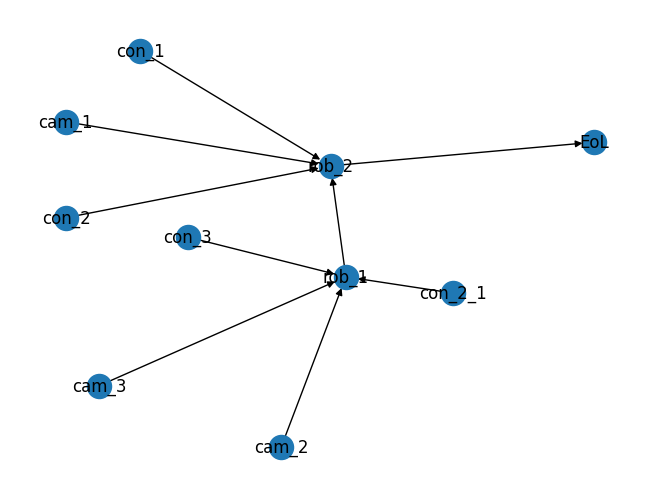

In [28]:
G = nx.DiGraph()

# Sensor - grouped
G.add_node("cam_1")
G.add_node("cam_2")
G.add_node("cam_3")
#G.add_node("cam_4")


G.add_node("con_1")
G.add_node("con_2")
G.add_node("con_3")

G.add_node("rob_1")
G.add_node("rob_2")


G.add_node("EoL")

# Conveyor affect camera

# Robot
G.add_edge("rob_2", "EoL")
G.add_edge("rob_1", "rob_2")

# Detection or Robot
G.add_edge("cam_2", "rob_1")
G.add_edge("cam_3", "rob_1")
#G.add_edge("cam_4", "rob_2")
G.add_edge("cam_1", "rob_2")

G.add_edge("con_1", "rob_2")
G.add_edge("con_2", "rob_2")
G.add_edge("con_3", "rob_1")
G.add_edge("con_2_1", "rob_1")

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

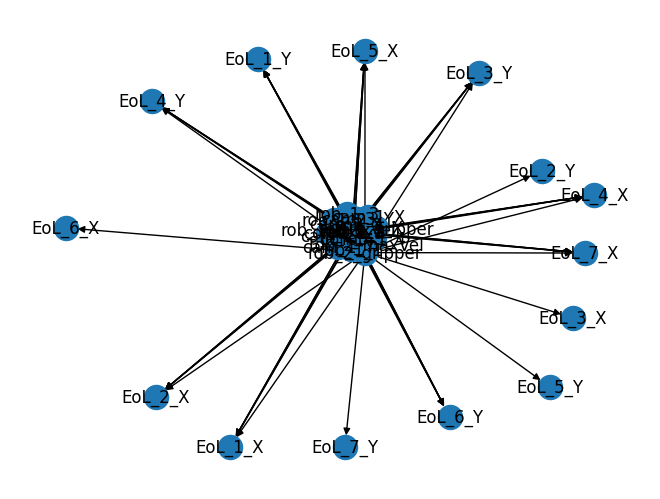

In [109]:
G = nx.DiGraph()

# Sensor - grouped
G.add_node("cam_1_X")
G.add_node("cam_2_X")
G.add_node("cam_3_X")

G.add_node("cam_1_Y")
G.add_node("cam_2_Y")
G.add_node("cam_3_Y")

G.add_node("EoL_1_X")
G.add_node("EoL_2_X")
G.add_node("EoL_3_X")
G.add_node("EoL_4_X")
G.add_node("EoL_5_X")
G.add_node("EoL_6_X")
G.add_node("EoL_7_X")

G.add_node("EoL_1_Y")
G.add_node("EoL_2_Y")
G.add_node("EoL_3_Y")
G.add_node("EoL_4_Y")
G.add_node("EoL_5_Y")
G.add_node("EoL_6_Y")
G.add_node("EoL_7_Y")

G.add_node("con_1")
G.add_node("con_2")
G.add_node("con_3")

G.add_node("rob_1_1")
G.add_node("rob_1_2")
G.add_node("rob_1_3")
G.add_node("rob_1_4")
G.add_node("rob_1_maxVel")

G.add_node("rob_2_1")
G.add_node("rob_2_2")
G.add_node("rob_2_3")
G.add_node("rob_2_4")
G.add_node("rob_2_maxVel")

G.add_node("rob_1_gripper")
G.add_node("rob_2_gripper")

# Camera to robot joint speeds
G.add_edge("cam_1_X", "rob_2_1")
G.add_edge("cam_1_Y", "rob_2_1")
G.add_edge("cam_1_X", "rob_2_2")
G.add_edge("cam_1_Y", "rob_2_2")
G.add_edge("cam_1_X", "rob_2_3")
G.add_edge("cam_1_Y", "rob_2_3")
G.add_edge("cam_1_X", "rob_2_4")
G.add_edge("cam_1_Y", "rob_2_4")

G.add_edge("cam_2_X", "rob_1_1")
G.add_edge("cam_2_Y", "rob_1_1")
G.add_edge("cam_2_X", "rob_1_2")
G.add_edge("cam_2_Y", "rob_1_2")
G.add_edge("cam_2_X", "rob_1_3")
G.add_edge("cam_2_Y", "rob_1_3")
G.add_edge("cam_2_X", "rob_1_4")
G.add_edge("cam_2_Y", "rob_1_4")

G.add_edge("cam_3_X", "rob_1_1")
G.add_edge("cam_3_Y", "rob_1_1")
G.add_edge("cam_3_X", "rob_1_2")
G.add_edge("cam_3_Y", "rob_1_2")
G.add_edge("cam_3_X", "rob_1_3")
G.add_edge("cam_3_Y", "rob_1_3")
G.add_edge("cam_3_X", "rob_1_4")
G.add_edge("cam_3_Y", "rob_1_4")

#MaxVel to robot joints
G.add_edge("rob_1_maxVel", "rob_1_1")
G.add_edge("rob_1_maxVel", "rob_1_2")
G.add_edge("rob_1_maxVel", "rob_1_3")
G.add_edge("rob_1_maxVel", "rob_1_4")

G.add_edge("rob_2_maxVel", "rob_2_1")
G.add_edge("rob_2_maxVel", "rob_2_2")
G.add_edge("rob_2_maxVel", "rob_2_3")
G.add_edge("rob_2_maxVel", "rob_2_4")

#Conveyor speed to robot
G.add_edge("con_2", "rob_1_1")
G.add_edge("con_2", "rob_1_2")
G.add_edge("con_2", "rob_1_3")
G.add_edge("con_2", "rob_1_4")

G.add_edge("con_3", "rob_1_1")
G.add_edge("con_3", "rob_1_2")
G.add_edge("con_3", "rob_1_3")
G.add_edge("con_3", "rob_1_4")

G.add_edge("con_2", "rob_2_1")
G.add_edge("con_2", "rob_2_2")
G.add_edge("con_2", "rob_2_3")
G.add_edge("con_2", "rob_2_4")

G.add_edge("con_1", "rob_2_1")
G.add_edge("con_1", "rob_2_2")
G.add_edge("con_1", "rob_2_3")
G.add_edge("con_1", "rob_2_4")

#Robot1 to robot2

G.add_edge("rob_1_1", "rob_2_1")
G.add_edge("rob_1_1", "rob_2_2")
G.add_edge("rob_1_1", "rob_2_3")
G.add_edge("rob_1_1", "rob_2_4")

G.add_edge("rob_1_2", "rob_2_1")
G.add_edge("rob_1_2", "rob_2_2")
G.add_edge("rob_1_2", "rob_2_3")
G.add_edge("rob_1_2", "rob_2_4")

G.add_edge("rob_1_3", "rob_2_1")
G.add_edge("rob_1_3", "rob_2_2")
G.add_edge("rob_1_3", "rob_2_3")
G.add_edge("rob_1_3", "rob_2_4")

G.add_edge("rob_1_4", "rob_2_1")
G.add_edge("rob_1_4", "rob_2_2")
G.add_edge("rob_1_4", "rob_2_3")
G.add_edge("rob_1_4", "rob_2_4")

G.add_edge("rob_1_gripper", "rob_2_1")
G.add_edge("rob_1_gripper", "rob_2_2")
G.add_edge("rob_1_gripper", "rob_2_3")
G.add_edge("rob_1_gripper", "rob_2_4")

#robot 2 to EoL

G.add_edge("rob_2_1", "EoL_1_X")
G.add_edge("rob_2_2", "EoL_1_X")
G.add_edge("rob_2_3", "EoL_1_X")
G.add_edge("rob_2_4", "EoL_1_X")

G.add_edge("rob_2_1", "EoL_1_Y")
G.add_edge("rob_2_2", "EoL_1_Y")
G.add_edge("rob_2_3", "EoL_1_Y")
G.add_edge("rob_2_4", "EoL_1_Y")

G.add_edge("rob_2_1", "EoL_2_X")
G.add_edge("rob_2_2", "EoL_2_X")
G.add_edge("rob_2_3", "EoL_2_X")
G.add_edge("rob_2_4", "EoL_2_X")

G.add_edge("rob_2_1", "EoL_3_Y")
G.add_edge("rob_2_2", "EoL_3_Y")
G.add_edge("rob_2_3", "EoL_3_Y")
G.add_edge("rob_2_4", "EoL_3_Y")

G.add_edge("rob_2_1", "EoL_4_X")
G.add_edge("rob_2_2", "EoL_4_X")
G.add_edge("rob_2_3", "EoL_4_X")
G.add_edge("rob_2_4", "EoL_4_X")

G.add_edge("rob_2_1", "EoL_4_Y")
G.add_edge("rob_2_2", "EoL_4_Y")
G.add_edge("rob_2_3", "EoL_4_Y")
G.add_edge("rob_2_4", "EoL_4_Y")

G.add_edge("rob_2_1", "EoL_5_X")
G.add_edge("rob_2_2", "EoL_5_X")
G.add_edge("rob_2_3", "EoL_5_X")
G.add_edge("rob_2_4", "EoL_5_X")

G.add_edge("rob_2_1", "EoL_6_Y")
G.add_edge("rob_2_2", "EoL_6_Y")
G.add_edge("rob_2_3", "EoL_6_Y")
G.add_edge("rob_2_4", "EoL_6_Y")

G.add_edge("rob_2_1", "EoL_7_X")
G.add_edge("rob_2_2", "EoL_7_X")
G.add_edge("rob_2_3", "EoL_7_X")
G.add_edge("rob_2_4", "EoL_7_X")

G.add_edge("rob_2_gripper", "EoL_1_X")
G.add_edge("rob_2_gripper", "EoL_1_Y")
G.add_edge("rob_2_gripper", "EoL_2_X")
G.add_edge("rob_2_gripper", "EoL_2_Y")
G.add_edge("rob_2_gripper", "EoL_3_X")
G.add_edge("rob_2_gripper", "EoL_3_Y")
G.add_edge("rob_2_gripper", "EoL_4_X")
G.add_edge("rob_2_gripper", "EoL_4_Y")
G.add_edge("rob_2_gripper", "EoL_5_X")
G.add_edge("rob_2_gripper", "EoL_5_Y")
G.add_edge("rob_2_gripper", "EoL_6_X")
G.add_edge("rob_2_gripper", "EoL_6_Y")
G.add_edge("rob_2_gripper", "EoL_7_X")
G.add_edge("rob_2_gripper", "EoL_7_Y")


# Draw the graph
nx.draw(G, with_labels=True)



In [115]:
g_ext = Digraph('G', filename='output', format='png')

nodes = [
    "cam_1_X", "cam_2_X", "cam_3_X",
    "cam_1_Y", "cam_2_Y", "cam_3_Y",
    "EoL_1_X", "EoL_2_X", "EoL_3_X", "EoL_4_X", "EoL_5_X", "EoL_6_X", "EoL_7_X",
    "EoL_1_Y", "EoL_2_Y", "EoL_3_Y", "EoL_4_Y", "EoL_5_Y", "EoL_6_Y", "EoL_7_Y",
    "con_1", "con_2", "con_3",
    "rob_1_1", "rob_1_2", "rob_1_3", "rob_1_4", "rob_1_maxVel",
    "rob_2_1", "rob_2_2", "rob_2_3", "rob_2_4", "rob_2_maxVel",
    "rob_1_gripper", "rob_2_gripper"
]

edges = [
    ("cam_1_X", "rob_2_1"), ("cam_1_Y", "rob_2_1"),
    ("cam_1_X", "rob_2_2"), ("cam_1_Y", "rob_2_2"),
    ("cam_1_X", "rob_2_3"), ("cam_1_Y", "rob_2_3"),
    ("cam_1_X", "rob_2_4"), ("cam_1_Y", "rob_2_4"),
    
    ("cam_2_X", "rob_1_1"), ("cam_2_Y", "rob_1_1"),
    ("cam_2_X", "rob_1_2"), ("cam_2_Y", "rob_1_2"),
    ("cam_2_X", "rob_1_3"), ("cam_2_Y", "rob_1_3"),
    ("cam_2_X", "rob_1_4"), ("cam_2_Y", "rob_1_4"),
    
    ("cam_3_X", "rob_1_1"), ("cam_3_Y", "rob_1_1"),
    ("cam_3_X", "rob_1_2"), ("cam_3_Y", "rob_1_2"),
    ("cam_3_X", "rob_1_3"), ("cam_3_Y", "rob_1_3"),
    ("cam_3_X", "rob_1_4"), ("cam_3_Y", "rob_1_4"),
    
    ("rob_1_maxVel", "rob_1_1"), ("rob_1_maxVel", "rob_1_2"),
    ("rob_1_maxVel", "rob_1_3"), ("rob_1_maxVel", "rob_1_4"),
    
    ("rob_2_maxVel", "rob_2_1"), ("rob_2_maxVel", "rob_2_2"),
    ("rob_2_maxVel", "rob_2_3"), ("rob_2_maxVel", "rob_2_4"),
    
    ("con_2", "rob_1_1"), ("con_2", "rob_1_2"), ("con_2", "rob_1_3"), ("con_2", "rob_1_4"),
    ("con_3", "rob_1_1"), ("con_3", "rob_1_2"), ("con_3", "rob_1_3"), ("con_3", "rob_1_4"),
    ("con_2", "rob_2_1"), ("con_2", "rob_2_2"), ("con_2", "rob_2_3"), ("con_2", "rob_2_4"),
    ("con_1", "rob_2_1"), ("con_1", "rob_2_2"), ("con_1", "rob_2_3"), ("con_1", "rob_2_4"),
    
    ("rob_1_1", "rob_2_1"), ("rob_1_1", "rob_2_2"), ("rob_1_1", "rob_2_3"), ("rob_1_1", "rob_2_4"),
    ("rob_1_2", "rob_2_1"), ("rob_1_2", "rob_2_2"), ("rob_1_2", "rob_2_3"), ("rob_1_2", "rob_2_4"),
    ("rob_1_3", "rob_2_1"), ("rob_1_3", "rob_2_2"), ("rob_1_3", "rob_2_3"), ("rob_1_3", "rob_2_4"),
    ("rob_1_4", "rob_2_1"), ("rob_1_4", "rob_2_2"), ("rob_1_4", "rob_2_3"), ("rob_1_4", "rob_2_4"),
    
    ("rob_1_gripper", "rob_2_1"), ("rob_1_gripper", "rob_2_2"),
    ("rob_1_gripper", "rob_2_3"), ("rob_1_gripper", "rob_2_4"),
    
    ("rob_2_1", "EoL_1_X"), ("rob_2_1", "EoL_1_Y"),
    ("rob_2_2", "EoL_1_X"), ("rob_2_2", "EoL_1_Y"),
    ("rob_2_3", "EoL_1_X"), ("rob_2_3", "EoL_1_Y"),
    ("rob_2_4", "EoL_1_X"), ("rob_2_4", "EoL_1_Y"),
    
    ("rob_2_1", "EoL_2_X"), ("rob_2_2", "EoL_2_X"),
    ("rob_2_3", "EoL_2_X"), ("rob_2_4", "EoL_2_X"),
    
    ("rob_2_1", "EoL_3_Y"), ("rob_2_2", "EoL_3_Y"),
    ("rob_2_3", "EoL_3_Y"), ("rob_2_4", "EoL_3_Y"),
    
    ("rob_2_1", "EoL_4_X"), ("rob_2_2", "EoL_4_X"),
    ("rob_2_3", "EoL_4_X"), ("rob_2_4", "EoL_4_X"),
    ("rob_2_1", "EoL_4_Y"), ("rob_2_2", "EoL_4_Y"),
    ("rob_2_3", "EoL_4_Y"), ("rob_2_4", "EoL_4_Y"),
    
    ("rob_2_1", "EoL_5_X"), ("rob_2_2", "EoL_5_X"),
    ("rob_2_3", "EoL_5_X"), ("rob_2_4", "EoL_5_X"),
    
    ("rob_2_1", "EoL_6_Y"), ("rob_2_2", "EoL_6_Y"),
    ("rob_2_3", "EoL_6_Y"), ("rob_2_4", "EoL_6_Y"),
    
    ("rob_2_1", "EoL_7_X"), ("rob_2_2", "EoL_7_X"),
    ("rob_2_3", "EoL_7_X"), ("rob_2_4", "EoL_7_X"),
    
    ("rob_2_gripper", "EoL_1_X"), ("rob_2_gripper", "EoL_1_Y"),
    ("rob_2_gripper", "EoL_2_X"), ("rob_2_gripper", "EoL_2_Y"),
    ("rob_2_gripper", "EoL_3_X"), ("rob_2_gripper", "EoL_3_Y"),
    ("rob_2_gripper", "EoL_4_X"), ("rob_2_gripper", "EoL_4_Y"),
    ("rob_2_gripper", "EoL_5_X"), ("rob_2_gripper", "EoL_5_Y"),
    ("rob_2_gripper", "EoL_6_X"), ("rob_2_gripper", "EoL_6_Y"),
    ("rob_2_gripper", "EoL_7_X"), ("rob_2_gripper", "EoL_7_Y"),
]

g_ext.attr(rankdir='TB')
g_ext.attr(ranksep="2 equally")
g_ext.attr(newrank="True")
g_ext.attr(center="True")

rob_1_nodes = [node for node in nodes if node.startswith("rob_1")]
rob_2_nodes = [node for node in nodes if node.startswith("rob_2")]
cam_1_nodes = [node for node in nodes if node.startswith("cam_1")]
cam_2_nodes = [node for node in nodes if node.startswith("cam_2")]
cam_3_nodes = [node for node in nodes if node.startswith("cam_3")]
con_nodes = [node for node in nodes if node.startswith("con")]
EoL_nodes = [node for node in nodes if node.startswith("EoL")]

with g_ext.subgraph(name='cluster_cam_1') as c1:
    c1.attr(label='Camera System 1')
    c1.attr(rank='source',bgcolor="lightblue")
    for node in cam_1_nodes:
        c1.node(node)

with g_ext.subgraph(name='cluster_cam_2') as c2:
    c2.attr(label='Camera System 2')
    c2.attr(rank='source',bgcolor="lightblue")
    for node in cam_2_nodes:
        c2.node(node)

with g_ext.subgraph(name='cluster_cam_3') as c3:
    c3.attr(label='Camera System 3')
    c3.attr(rank='source',bgcolor="lightblue")
    for node in cam_3_nodes:
        c3.node(node)

with g_ext.subgraph(name='cluster_con') as c4:
    c4.attr(label='Conveyors')
    c4.attr(rank='source',bgcolor="lightgrey")
    for node in con_nodes:
        c4.node(node)

with g_ext.subgraph(name='cluster_rob_1') as c5:
    c5.attr(label='Robotic System 1',bgcolor="lightyellow")
    c5.attr(rank='min')
    for node in rob_1_nodes:
        c5.node(node)

with g_ext.subgraph(name='cluster_rob_2') as c6:
    c6.attr(label='Robotic System 2',bgcolor="lightyellow")
    c6.attr(rank='max')
    for node in rob_2_nodes:
        c6.node(node)


with g_ext.subgraph(name='cluster_EoL') as c7:
    c7.attr(label='End of Line',bgcolor="lightgreen")
    c7.attr(rank='sink')
    for node in EoL_nodes:
        c7.node(node)


for edge in edges:
    g_ext.edge(edge[0], edge[1])

g_ext.render('output_extended',format='png', view=True)


TypeError: view() got an unexpected keyword argument 'format'

In [116]:
g_simp = Digraph()

nodes = [
    ("cam_1", "Camera 1"),
    ("cam_2", "Camera 2"),
    ("cam_3", "Camera 3"),
    ("con_1", "Conveyor 1"),
    ("con_2", "Conveyor 2"),
    ("con_3", "Conveyor 3"),
    ("rob_1", "Robot 1"),
    ("rob_2", "Robot 2"),
    ("EoL", "End of Line"),
]

edges = [
    ("rob_2", "EoL"),
    ("rob_1", "rob_2"),
    ("cam_2", "rob_1"),
    ("cam_3", "rob_1"),
    ("cam_1", "rob_2"),
    ("con_1", "rob_2"),
    ("con_2", "rob_2"),
    ("con_3", "rob_1"),
    ("con_2", "rob_1")
]

for node, label in nodes:
    if node.startswith("cam"):
        g_simp.node(node, label, style='filled', color='lightblue')
    elif node.startswith("con"):
        g_simp.node(node, label, style='filled', color='lightgrey')
    elif node.startswith("rob"):
        g_simp.node(node, label, style='filled', color='lightyellow')
    elif node == "EoL":
        g_simp.node(node, label, style='filled', color='lightgreen')

for edge in edges:
    g_simp.edge(edge[0], edge[1])

g_simp.render('output_simplified', format='png', view=True)


'output_simplified.png'

In [ ]:
G = nx.DiGraph()

# Sensor - grouped
G.add_node("cam_1")
G.add_node("cam_2")
G.add_node("cam_3")
#G.add_node("cam_4")


G.add_node("con_1")
G.add_node("con_2")
G.add_node("con_3")

G.add_node("rob_1")
G.add_node("rob_2")


G.add_node("EoL")

# Conveyor affect camera

# Robot
G.add_edge("rob_2", "EoL")
G.add_edge("rob_1", "rob_2")

# Detection or Robot
G.add_edge("cam_2", "rob_1")
G.add_edge("cam_3", "rob_1")
#G.add_edge("cam_4", "rob_2")
G.add_edge("cam_1", "rob_2")

G.add_edge("con_1", "rob_2")
G.add_edge("con_2", "rob_2")
G.add_edge("con_3", "rob_1")
G.add_edge("con_2_1", "rob_1")

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

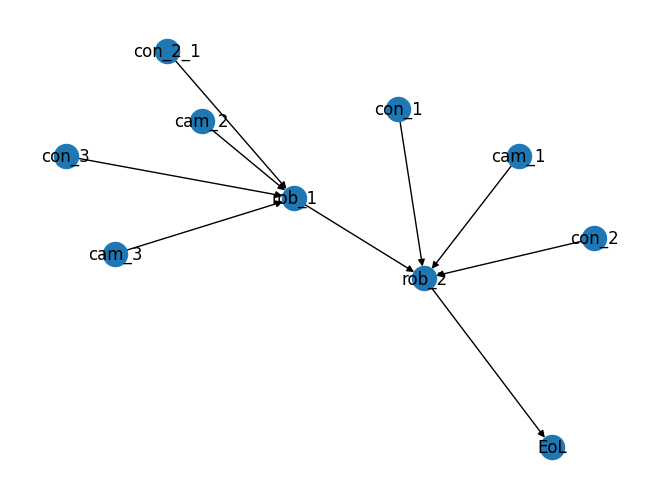

In [26]:
G = nx.DiGraph()

# Sensor - grouped
G.add_node("cam_1")
G.add_node("cam_2")
G.add_node("cam_3")
#G.add_node("cam_4")


G.add_node("con_1")
G.add_node("con_2")
G.add_node("con_3")

G.add_node("rob_1")
G.add_node("rob_2")


G.add_node("EoL")

# Conveyor affect camera

# Robot
G.add_edge("rob_2", "EoL")
G.add_edge("rob_1", "rob_2")

# Detection or Robot
G.add_edge("cam_2", "rob_1")
G.add_edge("cam_3", "rob_1")
#G.add_edge("cam_4", "rob_2")
G.add_edge("cam_1", "rob_2")

G.add_edge("con_1", "rob_2")
G.add_edge("con_2", "rob_2")
G.add_edge("con_3", "rob_1")
G.add_edge("con_2_1", "rob_1")

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

In [ ]:
G = nx.DiGraph()

# Sensor - grouped
G.add_node("cam_1")
G.add_node("cam_2")
G.add_node("cam_3")
#G.add_node("cam_4")


G.add_node("con_1")
G.add_node("con_2")
G.add_node("con_3")

G.add_node("rob_1")
G.add_node("rob_2")


G.add_node("EoL")

# Conveyor affect camera

# Robot
G.add_edge("rob_2", "EoL")
G.add_edge("rob_1", "rob_2")

# Detection or Robot
G.add_edge("cam_2", "rob_1")
G.add_edge("cam_3", "rob_1")
#G.add_edge("cam_4", "rob_2")
G.add_edge("cam_1", "rob_2")

G.add_edge("con_1", "rob_2")
G.add_edge("con_2", "rob_2")
G.add_edge("con_3", "rob_1")
G.add_edge("con_2_1", "rob_1")

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

## Plots of Camera

In [ ]:
fig,axs = plt.subplots(2,2,figsize = (10,10))
fig.suptitle('Camera 1',fontsize=16)

axs[0,0].plot(camera_1_df['sizeX'][116:])
axs[0,1].plot(camera_1_df['sizeY'][116:])
axs[1,0].hist(camera_1_df['sizeX'][116:], density = True)
axs[1,1].hist(camera_1_df['sizeY'][116:], density = True)

axs[0, 0].set_title('Size in X-Direction')
axs[0, 0].set_xlabel('index')
axs[0, 0].set_ylabel('sizeX')

axs[0, 1].set_title('Size in Y-Direction')
axs[0, 1].set_xlabel('index')
axs[0, 1].set_ylabel('sizeY')

axs[1, 0].set_title('Distribution in X-Direction')
axs[1, 0].set_xlabel('sizeX')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].set_title('Distribution in Y-Direction')
axs[1, 1].set_xlabel('sizeY')
axs[1, 1].set_ylabel('Frequency')


In [ ]:
fig,axs = plt.subplots(2,2,figsize = (10,10))
fig.suptitle('Camera 2',fontsize=16)

axs[0,0].plot(camera_2_df['sizeX'][165:])
axs[0,1].plot(camera_2_df['sizeY'][165:])
axs[1,0].hist(camera_2_df['sizeX'][165:])
axs[1,1].hist(camera_2_df['sizeY'][165:])

axs[0, 0].set_title('Size in X-Direction')
axs[0, 0].set_xlabel('index')
axs[0, 0].set_ylabel('sizeX')

axs[0, 1].set_title('Size in Y-Direction')
axs[0, 1].set_xlabel('index')
axs[0, 1].set_ylabel('sizeY')

axs[1, 0].set_title('Distribution in X-Direction')
axs[1, 0].set_xlabel('sizeX')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].set_title('Distribution in Y-Direction')
axs[1, 1].set_xlabel('sizeY')
axs[1, 1].set_ylabel('Frequency')

In [ ]:
fig,axs = plt.subplots(2,2,figsize = (10,10))
fig.suptitle('Camera 3',fontsize=16)

axs[0,0].plot(camera_3_df['sizeX'][175:])
axs[0,1].plot(camera_3_df['sizeY'][175:])
axs[1,0].hist(camera_3_df['sizeX'][175:])
axs[1,1].hist(camera_3_df['sizeY'][175:])

axs[0, 0].set_title('Size in X-Direction')
axs[0, 0].set_xlabel('index')
axs[0, 0].set_ylabel('sizeX')

axs[0, 1].set_title('Size in Y-Direction')
axs[0, 1].set_xlabel('index')
axs[0, 1].set_ylabel('sizeY')

axs[1, 0].set_title('Distribution in X-Direction')
axs[1, 0].set_xlabel('sizeX')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].set_title('Distribution in Y-Direction')
axs[1, 1].set_xlabel('sizeY')
axs[1, 1].set_ylabel('Frequency')

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(int((time.time())))
U1 = np.random.uniform(size = 400)
U2 = np.random.uniform(size = 400)
R = np.sqrt(-2 * np.log(U1))
Theta = 2 * np.pi * U2
X = R * np.cos(Theta)*0.5 + 50
Y = R * np.sin(Theta)*5 + 50
varX = np.var(X)
varY = np.var(Y)
avX = np.average(X)
avY = np.average(Y)
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15,5))
nX, binsX, patchesX= ax1.hist(X, density = True)
ax1.set_title("Normal")

fitX = ((1 / (np.sqrt(2 * np.pi) * np.sqrt(varX))) *np.exp(-0.5 * (1 / np.sqrt(varX) * (binsX - avX))**2))
ax1.plot(binsX, fitX, '--')

nY, binsY, patchesY = ax2.hist(Y, density = True)
ax2.set_title("Interventional")
fitY = ((1 / (np.sqrt(2 * np.pi) * np.sqrt(varY))) *np.exp(-0.5 * (1 / np.sqrt(varY) * (binsY - avY))**2))
ax2.plot(binsY, fitY, '--')

ax3.set_title("Normal vs Interventional")
ax3.plot(binsX, fitX, '-', label='Normal')
ax3.plot(binsY, fitY, '-', label = 'Interventional')
ax3.legend(loc='upper right')

plt.legend()
plt.show()

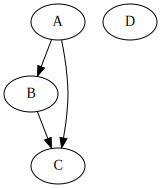

In [21]:

from graphviz import Digraph

g = Digraph()
g.edge("B", "C")
g.node("D")
g.edge("A", "B")
g.edge("A", "C")

g.format = 'png'
#g.render('causal_graph')
g



In [ ]:
from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas
from causalnex.network import BayesianNetwork
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

# Create a StructureModel (initially empty)
sm = StructureModel()

# Add nodes
sm.add_nodes_from(['A', 'B', 'C'])

# Add edges (directed links)
sm.add_edge('A', 'B')
sm.add_edge('B', 'C')

# Visualize the structure (optional)
viz = plot_structure(sm, graph_attributes={"scale": "0.5"},
                     all_node_attributes=NODE_STYLE.WEAK,
                     all_edge_attributes=EDGE_STYLE.WEAK)
viz.draw("images/bn_graph.png")

# Create a Bayesian Network from the StructureModel
bn = BayesianNetwork(sm)

# Plot the Bayesian Network (DAG)
viz.draw()
